# Object-oriented programming (OOP)

### I. Câu hỏi tự luận

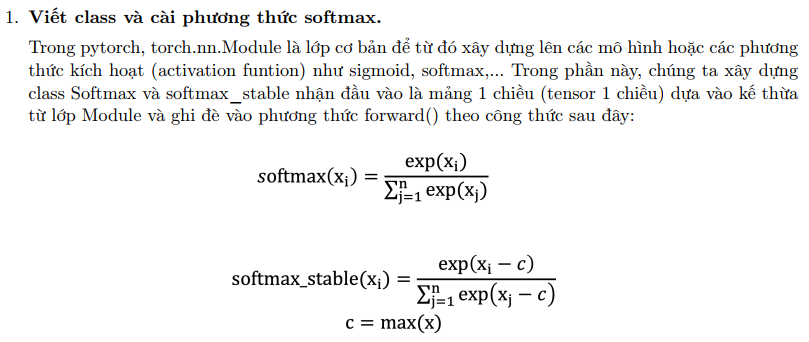

In [1]:
import torch
import torch.nn as nn


class MySoftmax(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x_exp = torch.exp(x)
        partition = x_exp.sum(0, keepdims=True)
        return x_exp / partition


data = torch.Tensor([1, 2, 3])
my_softmax = MySoftmax()
output = my_softmax(data)
print(output)


tensor([0.0900, 0.2447, 0.6652])


In [2]:
import torch
import torch.nn as nn


class MySoftmaxStable(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x_max = torch.max(x, dim=0, keepdims=True)
        x_exp = torch.exp(x - x_max.values)
        partition = x_exp.sum(0, keepdims=True)
        return x_exp / partition


data = torch.Tensor([1, 2, 3])
softmax_stable = MySoftmaxStable()
output = softmax_stable(data)
print(output)

tensor([0.0900, 0.2447, 0.6652])


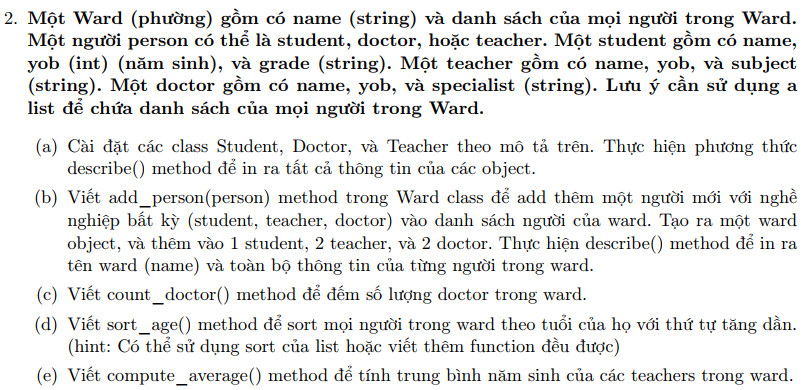

In [3]:
from abc import ABC, abstractmethod


class Person(ABC):
    def __init__(self, name: str, yob: float):
        self._name = name
        self._yob = yob

    def getName(self):
        return self._name

    def getYob(self):
        return self._yob

    @abstractmethod
    def describe(self):
        pass


class Student(Person):
    def __init__(self, name: str, yob: float, grade: str):
        super().__init__(name, yob)
        self.__grade = grade

    def describe(self):
        print(
            f"Student - Name: {self._name} - YoB: {self._yob} - Grade: {self.__grade}")


class Teacher(Person):
    def __init__(self, name: str, yob: float, subject: str):
        super().__init__(name, yob)
        self.__subject = subject

    def describe(self):
        print(
            f"Teacher - Name: {self._name} - YoB: {self._yob} - Subject: {self.__subject}")


class Doctor(Person):
    def __init__(self, name: str, yob: float, specialist: str):
        super().__init__(name, yob)
        self.__specialist = specialist

    def describe(self):
        print(
            f"Doctor - Name: {self._name} - YoB: {self._yob} - Specialist: {self.__specialist}")


class Ward:
    def __init__(self, name: str):
        self.__name = name
        self.__nameList = list()

    def addPerson(self, person: Person):
        self.__nameList.append(person)

    def describe(self):
        print(f"Name of Ward: {self.__name}")
        for p in self.__nameList:
            p.describe()

    def countDoctor(self):
        count_doctor = 0
        for p in self.__nameList:
            if isinstance(p, Doctor):
                count_doctor += 1
        return count_doctor

    def sortAge(self):
        sorted_list = sorted(
            self.__nameList, key=lambda x: x.getYob(), reverse=True)
        return sorted_list

    def computeAvgTeacher(self):
        counter = 0
        total = 0
        for p in self.__nameList:
            if isinstance(p, Teacher):
                counter += 1
                total += p.getYob()
        return total / counter


print('-------')
print('Câu a: ')
student1 = Student(name="studentA", yob=2010, grade="7")
student1.describe()

teacher1 = Teacher(name="teacherA", yob=1969, subject="Math")
teacher1.describe()

doctor1 = Doctor(name="doctorA", yob=1945, specialist="Endocrinologists")
doctor1.describe()

print('-------')
print('Câu b: ')
teacher2 = Teacher(name="teacherB", yob=1995, subject="History")
doctor2 = Doctor(name="doctorB ", yob=1975, specialist="Cardiologists")
ward1 = Ward(name="Ward1")
ward1.addPerson(student1)
ward1.addPerson(teacher1)
ward1.addPerson(teacher2)
ward1.addPerson(doctor1)
ward1.addPerson(doctor2)
ward1.describe()

print('-------')
print('Câu c: ')
print(f"Number of doctors : {ward1.countDoctor()}")

print('-------')
print('Câu d: ')
print('After sorting Age of Ward1 people')
sorted_persons = ward1.sortAge()
for person in sorted_persons:
    person.describe()


print('-------')
print('Câu e: ')
print(f"Average year of birth (teachers): {ward1.computeAvgTeacher()}")


-------
Câu a: 
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
-------
Câu b: 
Name of Ward: Ward1
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
Doctor - Name: doctorB  - YoB: 1975 - Specialist: Cardiologists
-------
Câu c: 
Number of doctors : 2
-------
Câu d: 
After sorting Age of Ward1 people
Student - Name: studentA - YoB: 2010 - Grade: 7
Teacher - Name: teacherB - YoB: 1995 - Subject: History
Doctor - Name: doctorB  - YoB: 1975 - Specialist: Cardiologists
Teacher - Name: teacherA - YoB: 1969 - Subject: Math
Doctor - Name: doctorA - YoB: 1945 - Specialist: Endocrinologists
-------
Câu e: 
Average year of birth (teachers): 1982.0


![](BT3.png)

In [4]:
class MyStack():
    def __init__(self, capacity):
        self.__capacity = capacity
        self.__data = []

    def getData(self):
        return self.__data

    def isEmpty(self):
        return len(self.__data) == 0

    def isFull(self):
        return len(self.__data) == self.__capacity

    def popFirstElement(self):
        if self.isEmpty():
            print("Empty")
            return
        return self.__data.pop()

    def pushElement(self, value):
        if self.isFull():
            print("Full")
            return
        return self.__data.append(value)

    def getFirstElement(self):
        if self.isEmpty():
            print("Empty")
            return
        return self.__data[-1]


stack1 = MyStack(capacity=5)
print('Stack ban đầu: ', stack1.getData())
stack1.pushElement(1)
stack1.pushElement(2)
print('Stack sau khi thêm giá trị: ', stack1.getData())
print('Stack đã đủ giá trị chưa? ', stack1.isFull())
print('Lấy giá trị vừa thêm vào: ', stack1.getFirstElement())
print('Giá trị vừa xóa: ', stack1.popFirstElement())
print('Lấy giá trị tiếp theo: ', stack1.getFirstElement())
print('Giá trị vừa xóa: ', stack1.popFirstElement())
print('Stack có rỗng không? ', stack1.isEmpty())

Stack ban đầu:  []
Stack sau khi thêm giá trị:  [1, 2]
Stack đã đủ giá trị chưa?  False
Lấy giá trị vừa thêm vào:  2
Giá trị vừa xóa:  2
Lấy giá trị tiếp theo:  1
Giá trị vừa xóa:  1
Stack có rỗng không?  True


![](BT4.png)

In [5]:
class MyQueue():
    def __init__(self, capacity):
        self.__data = []
        self.__capacity = capacity

    def getData(self):
        return self.__data

    def isEmpty(self):
        return len(self.__data) == 0

    def isFull(self):
        return len(self.__data) == self.__capacity

    def dequeueFirstElement(self):
        if self.isEmpty():
            print('Empty')
            return
        return self.__data.pop(0)

    def addElement(self, value):
        if self.isFull():
            print('Full')
            return
        return self.__data.append(value)

    def getFirstElement(self):
        if self.isEmpty():
            print('Empty')
            return
        return self.__data[0]


queue1 = MyQueue(capacity=5)
print('Queue ban đầu: ', queue1.getData())
queue1.addElement(1)
queue1.addElement(2)
print('Queue sau khi thêm giá trị: ', queue1.getData())
print('Queue đã đủ giá trị chưa? ', queue1.isFull())
print('Lấy giá trị vị trí đầu tiên trong Queue: ', queue1.getFirstElement())
print('Xóa giá trị vị trí đầu tiên trong Queue: ', queue1.dequeueFirstElement())
print('Lấy giá trị vị trí đầu tiên trong Queue: ', queue1.getFirstElement())
print('Xóa giá trị vị trí đầu tiên trong Queue: ', queue1.dequeueFirstElement())
print('Queue có rỗng không? ', queue1.isEmpty())

Queue ban đầu:  []
Queue sau khi thêm giá trị:  [1, 2]
Queue đã đủ giá trị chưa?  False
Lấy giá trị vị trí đầu tiên trong Queue:  1
Xóa giá trị vị trí đầu tiên trong Queue:  1
Lấy giá trị vị trí đầu tiên trong Queue:  2
Xóa giá trị vị trí đầu tiên trong Queue:  2
Queue có rỗng không?  True


### II. Câu hỏi trắc nghiệm

In [6]:
#Câu hỏi 1:
data = torch.Tensor([1 , 2, 3])
softmax_function = nn.Softmax(dim =0)
output = softmax_function(data)
assert round(output[0].item(), 2) == 0.09
output

tensor([0.0900, 0.2447, 0.6652])

In [7]:
#Câu hỏi 2:

data = torch.Tensor([5, 2, 4])
my_softmax = MySoftmax()
output = my_softmax(data )
assert round(output[-1].item(), 2) == 0.26
output

tensor([0.7054, 0.0351, 0.2595])

In [8]:
#Câu hỏi 3:

data = torch.Tensor([1, 2, 300000000])
my_softmax = MySoftmax()
output = my_softmax(data)
assert round(output[0].item(), 2) == 0.0
output

tensor([0., 0., nan])

In [9]:
#Câu hỏi 4:

data = torch.Tensor([1, 2, 3])
softmax_stable = MySoftmaxStable()
output = softmax_stable(data)
assert round(output[ -1].item(), 2) == 0.67
output

tensor([0.0900, 0.2447, 0.6652])

In [10]:
#Câu hỏi 5:

student2 = Student(name="studentZ2023", yob=2011 , grade="6")
assert student2._yob == 2011
student2.describe ()

Student - Name: studentZ2023 - YoB: 2011 - Grade: 6


In [18]:
#Câu hỏi 6:
teacher1 = Teacher(name ="teacherZ2023", yob=1991, subject="History")
assert teacher1._yob == 1991
teacher1.describe()

Teacher - Name: teacherZ2023 - YoB: 1991 - Subject: History


In [19]:
#Câu hỏi 7:
doctor1 = Doctor(name ="doctorZ2023", yob=1981, specialist="Endocrinologists")
assert doctor1._yob == 1981
doctor1.describe()

Doctor - Name: doctorZ2023 - YoB: 1981 - Specialist: Endocrinologists


In [21]:
#Câu hỏi 8:
ward1.countDoctor()

2

In [23]:
#Câu hỏi 9:
stack2 = MyStack(capacity=5)
stack2.pushElement(1)
assert stack2.isFull() == False
stack1.pushElement(2)
print(stack2.isFull())

False


In [24]:
#Câu hỏi 10:
print(stack2.getFirstElement())

1


In [26]:
#Câu hỏi 11:
queue2 = MyQueue(capacity=5)
queue2.addElement(1)
assert queue2.isFull() == False
queue1.addElement(2)
print(queue1.isFull())

False


In [27]:
#Câu hỏi 12:
queue2 = MyQueue(capacity=5)
queue2.addElement(1)
assert queue2.isFull() == False
queue2.addElement(2)
print(queue2.getFirstElement())

1
